<a href="https://colab.research.google.com/github/Edna-soso/DataAnalysis_Project/blob/main/Data_Visualization/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pywedge

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go

import pywedge as pw
import pandas as pd

In [4]:
data = pd.read_csv('/content/drive/MyDrive/python_OP/Clean_Dataset.csv')

In [5]:
data.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
397919    541904
397920    541905
397921    541906
397922    541907
397923    541908
Name: Unnamed: 0, Length: 397924, dtype: int64

In [6]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Month,Year,TotalCost
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,12/9/2011,12:50,12,12,2011,10.20
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12/9/2011,12:50,12,12,2011,12.60
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,12/9/2011,12:50,12,12,2011,16.60
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,12/9/2011,12:50,12,12,2011,16.60
397923,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,12/9/2011,12:50,12,12,2011,14.85


In [7]:
moving_column= data.pop("TotalCost")
data.insert(6,"TotalCost", moving_column)


In [8]:
moving_column= data.pop("InvoiceDate")
data.insert(7,"InvoiceDate", moving_column)

# **Khách hàng VIP**

In [9]:
def VIP_customer():
  n= int(input("Nhập vào số lượng khách hàng VIP muốn xem: "))
  quan_stock = data.groupby("CustomerID").count()["InvoiceNo"]
  quan_stock= quan_stock.sort_values()
  quan_stock_top= quan_stock.nlargest(n)
  quan_stock_top.plot.bar()
  plt.title("Top khách hàng tiêu biểu")
  plt.ylabel("Số lần mua")
  plt.show()


Nhập vào số lượng khách hàng VIP muốn xem: 3


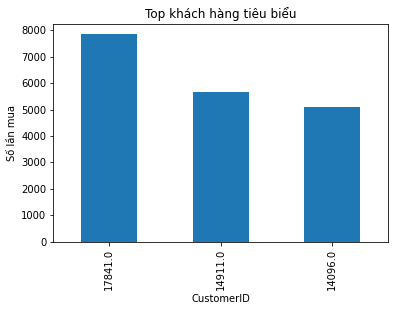

In [10]:
VIP_customer()

# **Tháng có doanh số cao nhất?**

In [36]:
def bestsales_month():
  data['Year'].value_counts().plot(kind='pie')
  plt.pause(0.05)
  data_2010= data[data["Year"]=='2010']
  data_2011= data[data["Year"]=='2011']
  months = range(1,13)

  while (True):
    choice = int(input("Nhập vào năm bạn muốn xem tháng có doanh số cao nhất:\n1.2010\n2.2011\n3.Cả 2 năm\n4.Thoát\n"))
    if choice == 1:
      chart_style= int(input("Biểu đồ: \n1.Đường\n2.Cột\n"))
      if chart_style == 1:
        gr_month = data.groupby('Month')['TotalCost'].sum().reset_index()
        fig = px.line(gr_month, x ='Month', y ='TotalCost', template='plotly_dark')
        fig.show()
      elif chart_style ==2:
        gr_month= data_2010.groupby("Month").sum()["TotalCost"]
        plt.bar(12, gr_month, align='center')
        plt.xticks(months)
        plt.xlabel("Months")
        plt.ylabel("TotalCost")    
        plt.pause(0.05)
    elif choice == 2:
      chart_style= int(input("Biểu đồ: \n1.Đường\n2.Cột\n"))
      if chart_style == 1:
        gr_month = data.groupby('Month')['TotalCost'].sum().reset_index()
        fig = px.line(gr_month, x ='Month', y ='TotalCost', template='plotly_dark')
        fig.show()
      elif chart_style ==2:
        gr_month= data_2011.groupby("Month").sum()["TotalCost"]
        plt.bar(months, gr_month, align='center')
        plt.xticks(months)
        plt.xlabel("Months")
        plt.ylabel("TotalCost")    
        plt.pause(0.05)
    elif choice == 3:
      chart_style= int(input("Biểu đồ: \n1.Đường\n2.Cột\n"))
      if chart_style == 1:
        gr_month = data.groupby('Month')['TotalCost'].sum().reset_index()
        fig = px.line(gr_month, x ='Month', y ='TotalCost', template='plotly_dark')
        fig.show()
      elif chart_style ==2:
        gr_month= data.groupby("Month").sum()["TotalCost"]
        plt.bar(months, gr_month, align='center')
        plt.xticks(months)
        plt.xlabel("Months")
        plt.ylabel("TotalCost")    
        plt.pause(0.05)
    else:
      break

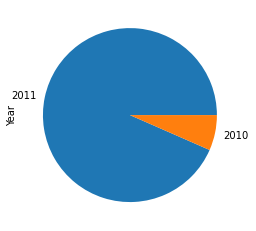

Nhập vào năm bạn muốn xem tháng có doanh số cao nhất:
1.2010
2.2011
3.Cả 2 năm
4.Thoát
1
Biểu đồ: 
1.Đường
2.Cột
1


Nhập vào năm bạn muốn xem tháng có doanh số cao nhất:
1.2010
2.2011
3.Cả 2 năm
4.Thoát
2
Biểu đồ: 
1.Đường
2.Cột
2


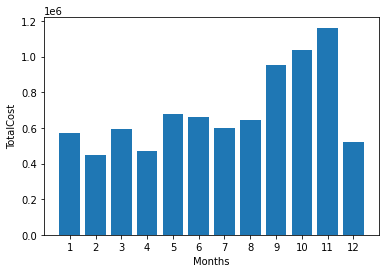

Nhập vào năm bạn muốn xem tháng có doanh số cao nhất:
1.2010
2.2011
3.Cả 2 năm
4.Thoát
3
Biểu đồ: 
1.Đường
2.Cột
2


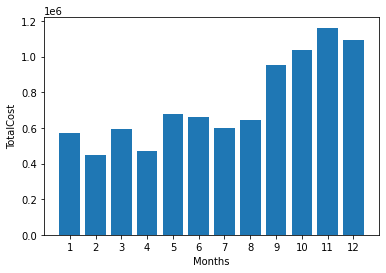

Nhập vào năm bạn muốn xem tháng có doanh số cao nhất:
1.2010
2.2011
3.Cả 2 năm
4.Thoát
4


In [37]:
bestsales_month()

#**Country nào có doanh số cao nhất** 

In [59]:
def bestsales_country():
  gr_country = data.groupby("Country").sum()["TotalCost"].sort_values(ascending= False).reset_index()
  fig=px.bar(gr_country, x='Country', y='TotalCost', width=900)
  fig.show() 

In [39]:
bestsales_country()

# **Doanh nghiệp nên quảng cáo vào khung giờ nào để tăng doanh thu?**

In [40]:
def best_time():
  gr_hour = data.groupby("Hour").count()["TotalCost"]
  hour = [hour for hour, totalcost in gr_hour.items()]
  plt.plot(hour, gr_hour)
  plt.grid()
  plt.xticks(hour, size=8)
  plt.xlabel("Time")
  plt.ylabel("TotalCost")
  plt.title("Số lượng đơn hàng theo khung giờ")


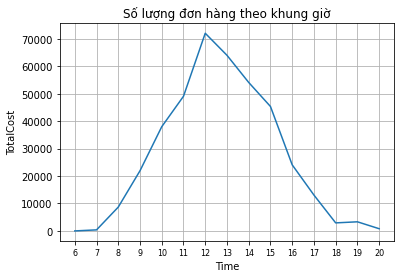

In [41]:
best_time()

# **Các sản phẩm nào thường được khách hàng mua kèm với nhau**

In [42]:
def combo_product():
  n = int(input("Nhập vào top combo muốn xem: "))
  data_dup = data[data["InvoiceNo"].duplicated(keep= False)]
  gr_product = lambda product: ','.join(product) 
  data_dup["All_Products"]= data_dup.groupby("InvoiceNo")["StockCode"].transform(gr_product)
  data_combo= data_dup[["InvoiceNo","All_Products"]].drop_duplicates()
  data_combo["All_Products"].value_counts()
  plt.rcParams['figure.figsize'] = (12, 10)
  a = data_combo["All_Products"].value_counts().head(n)
  sns.barplot(x = a.values, y = a.index, palette = 'inferno')
  plt.title('Top combo sản phẩm ', fontsize = 20)
  plt.ylabel('Names of Combo Product',fontsize=18)
  plt.xlabel
  plt.show()


Nhập vào top combo muốn xem: 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



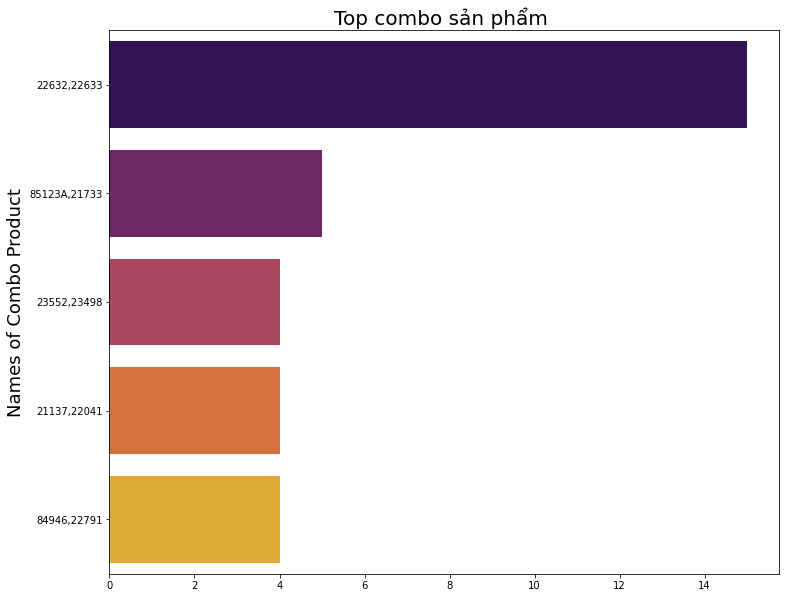

In [44]:
combo_product()

# **Sản phẩm nào bán chạy nhất và tại sao?**

In [45]:
def bestsales_product():
  all_products_pri =  data.groupby("StockCode").mean()["UnitPrice"]
  all_products= data.groupby("StockCode").sum()['Quantity']
  product_ls = [StockCode for StockCode, Quantity in all_products.items()]
  quan_ls = [int(Quantity) for StockCode, Quantity in all_products.items()]
  price_ls = [UnitPrice for StockCode, UnitPrice in all_products_pri.items()]
  arr_quan_pro=[]
  arr_quan_pro.append(quan_ls)
  arr_quan_pro.append(product_ls)
  arr_quan_pro.append(price_ls)
  ind = np.argpartition(arr_quan_pro[0], -10)[-10:]
  print(ind[1])
  print( "Mã sản phẩm", " | ", "Số lượng đã bán", " |   Giá")
  x=y1=y2=[]
  for i in ind:
    x.append(arr_quan_pro[1][i])
    y1.append(int(arr_quan_pro[0][i]))
    y2.append(arr_quan_pro[2][i])
    print(arr_quan_pro[1][i], " : \t", arr_quan_pro[0][i], " :      \t",arr_quan_pro[2][i])
  top_10_pro= all_products.sort_values()[3640:]
  pro_ls =  [StockCode for StockCode, Quantity in top_10_pro.items()]
  da = data.groupby(data["StockCode"]).mean()["UnitPrice"]
  da= pd.DataFrame(da)
  da= da.reset_index()
  avg_price=[]
  for i in pro_ls:
    arr = da[da["StockCode"] == str(i)]
    arr= np.array(arr)
    #avg_price.append(arr[1])
    #print(arr[0])
    avg_price.append(arr[0][1])
  x= pro_ls
  y1= top_10_pro
  y2= avg_price
  fig, ax1 = plt.subplots()
  ax2= ax1.twinx()
  ax1.bar(x, y1, color = "g")
  ax2.plot(x, y2, 'b-')

  ax1.set_xticklabels(pro_ls, rotation=90, size=8)
  ax1.set_xlabel("Products")
  ax1.set_ylabel("Quatity")
  ax2.set_ylabel("Price Each")
  plt.show()
    

  



In [51]:
def Menu_Visua():
  while(True):
    choice = int(input('-------------------------THÔNG TIN MUỐN XEM-------------------------------\n1.Khách hàng VIP\n2.Tháng có doanh số cao nhất\n3.Country có doanh số cao nhất\n4Sản phẩm nào bán chạy nhất và tại sao?\n5.Các combo sản phẩm thường được mua cùng nhau\n6.Doanh nghiệp nên quảng cáo vào khung giờ nào?\n7.Thoát\n'))
    if choice==1:
      VIP_customer()
    elif choice ==2:
      best_sales_month()
    elif choice==3:
      bestsales_country()
    elif choice==4:
      bestsales_product
    elif choice==5:
      combo_product()
    elif choice==6:
      best_time()
    else:
      break

In [52]:
Menu_Visua()

-------------------------THÔNG TIN MUỐN XEM-------------------------------
1.Khách hàng VIP
2.Tháng có doanh số cao nhất
3.Country có doanh số cao nhất
4Sản phẩm nào bán chạy nhất và tại sao?
5.Các combo sản phẩm thường được mua cùng nhau
6.Doanh nghiệp nên quảng cáo vào khung giờ nào?
7.Thoát
7


#Tìm độ chêch lệch trên trục dữ liệu
Thống kê trong 1 ngày, tần số (Frequency) và lần mua gần nhất số lượng bao nhiêu (Recency) và số tiền thu nhập (Monetary) theo khách hàng.

In [53]:
RFM_data = pd.read_csv('/content/drive/MyDrive/python_OP/RFM_data.csv')
RFM_data.pop('Unnamed: 0')
RFM_data.head()


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level
0,12347.0,2,182,4310.00,1,1,1,111,3,True Lover
1,12348.0,75,31,1797.24,3,3,1,331,7,Flirting
2,12349.0,18,73,1757.55,2,2,1,221,5,True Lover
3,12350.0,310,17,334.40,4,4,3,443,11,Platonic Friend
4,12352.0,36,85,2506.04,2,2,1,221,5,True Lover


In [54]:
fig = px.scatter(RFM_data,x = "Recency", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = "Monetary", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Monetary V/s Recency
fig = px.scatter(RFM_data,x = "Monetary", y = "Recency",color = "RFM_Loyality_level")
fig.show()

In [55]:
RFM_data = pd.read_csv('/content/drive/MyDrive/python_OP/K-Mean_data.csv')
RFM_data.pop('Unnamed: 0')
RFM_data.head()


,Unnamed: 0.1,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level,Cluster
0,0,12347.0,2,182,4310.00,1,1,1,111,3,True Lover,Cluster2
1,1,12348.0,75,31,1797.24,3,3,1,331,7,Flirting,Cluster1
2,2,12349.0,18,73,1757.55,2,2,1,221,5,True Lover,Cluster1
3,3,12350.0,310,17,334.40,4,4,3,443,11,Platonic Friend,Cluster0
4,4,12352.0,36,85,2506.04,2,2,1,221,5,True Lover,Cluster1


In [56]:
# Recency V/s Frequency
fig = px.scatter(RFM_data,x = 'Recency',y = 'Frequency', color = 'Cluster')
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = 'Monetary',y = 'Frequency', color = 'Cluster')
fig.show()

# Recency V/s Monetary
fig = px.scatter(RFM_data,x = 'Monetary',y = 'Recency', color = 'Cluster')
fig.show()

In [57]:
mc=pw.Pywedge_Charts(RFM_data,c=None,y="RFM_Loyality_level")

In [58]:
charts =mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')